<a href="https://colab.research.google.com/github/shruti3000/Travel-Package/blob/main/Travel_Package_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Whether A Customer Will Buy Travel PackageOr Not

![](https://www.bajajallianz.com/content/dam/bagic/travel-insurance/individual-travel-insurance/Individual_Travel_Insurance_V3.png)

A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.
The New Insurance Package Also Includes Covid Cover.
The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.
The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.
The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters.



### Content

Age- Age Of The Customer  
Employment Type- The Sector In Which Customer Is Employed  
GraduateOrNot- Whether The Customer Is College Graduate Or Not  
AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]  
FamilyMembers- Number Of Members In Customer's Family  
ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.  
FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].  
EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]  
TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.


### One can find the used Dataset [Here](https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data)

In [ ]:
#First, it is important to import all essential libraries used
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys
!{sys.executable} -m pip install xgboost
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
df=pd.read_csv(r'/content/TravelInsurancePrediction.csv')
df.head()
#I have imported the dataset here, note that so far it is a single dataset, I will divide it into datasets further

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
#To get idea about the shape of the dataset i.e. number of rows and columns
df.shape

(1987, 10)

## Exploaratory Data Analysis

In [ ]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
df.nunique()

Unnamed: 0             1987
Age                      11
Employment Type           2
GraduateOrNot             2
AnnualIncome             30
FamilyMembers             8
ChronicDiseases           2
FrequentFlyer             2
EverTravelledAbroad       2
TravelInsurance           2
dtype: int64

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [ ]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


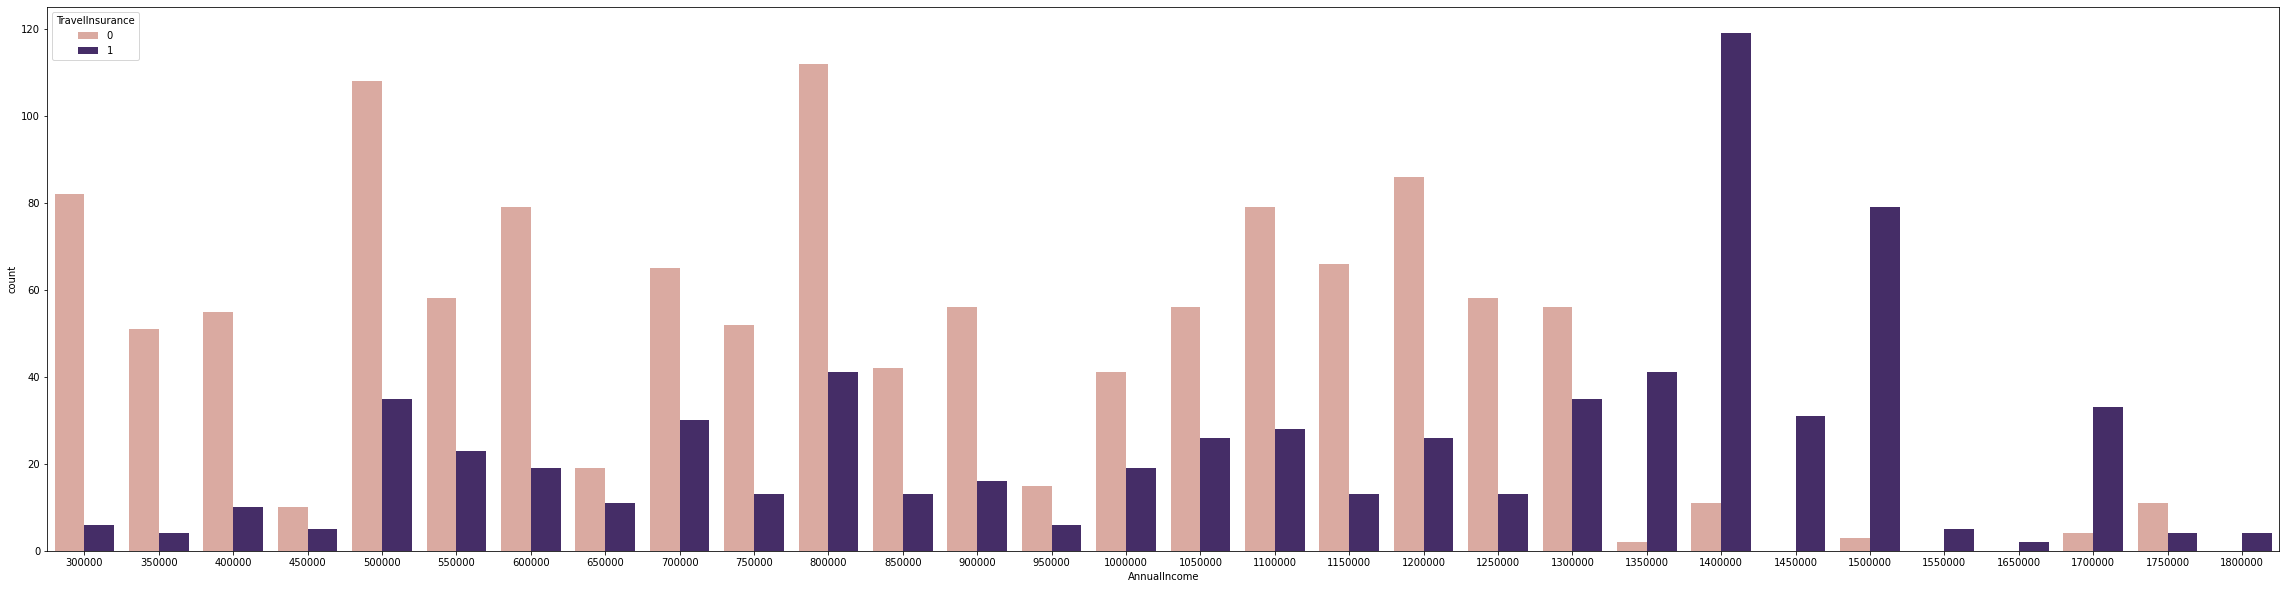

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot('AnnualIncome',hue='TravelInsurance',data=df, palette=['#E4A497','#432371'])
plt.show()

It's clear that people with Annual Income >1300000 are more likely to take Travel Insurance.

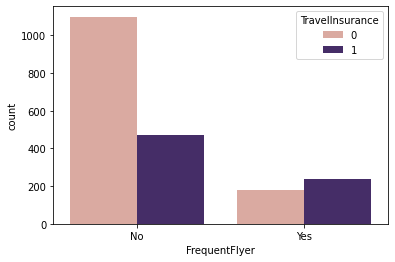

In [ ]:
sns.countplot('FrequentFlyer',hue='TravelInsurance',data=df,palette=['#E4A497','#432371'])
plt.show()

People who fly frequently are more likey to take insurance.

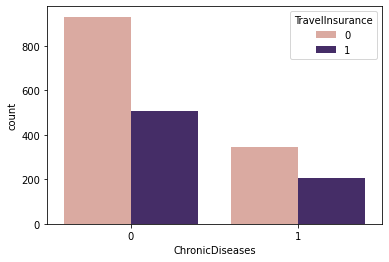

In [ ]:
sns.countplot('ChronicDiseases',hue='TravelInsurance',data=df, palette=['#E4A497','#432371'])
plt.show()

Taking Travel Insurance or not, isn't really affected by presence or absence of Chronic Diseases.

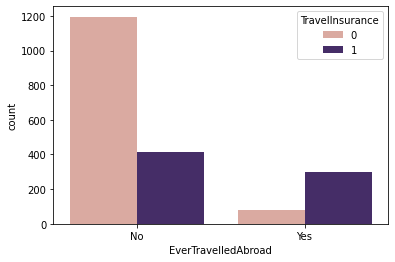

In [ ]:
sns.countplot('EverTravelledAbroad',hue='TravelInsurance',data=df, palette=['#E4A497','#432371'])
plt.show()

People who have travelled abroad are more likely to take Travel Insurance.

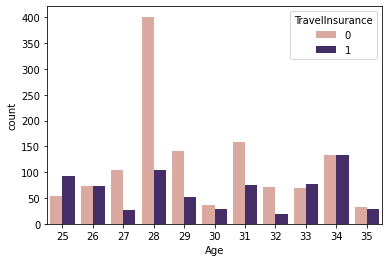

In [ ]:
sns.countplot('Age',hue='TravelInsurance',data=df, palette=['#E4A497','#432371'])
plt.show()

People who are 33 or older, are more likely to take Travel Insurance.

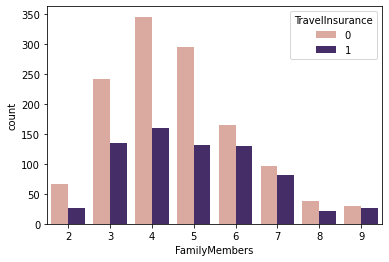

In [ ]:
sns.countplot('FamilyMembers',hue='TravelInsurance',data=df, palette=['#E4A497','#432371'])
plt.show()

Number of Family members, doesn't look like a factor to influence taking Travel Insurance.

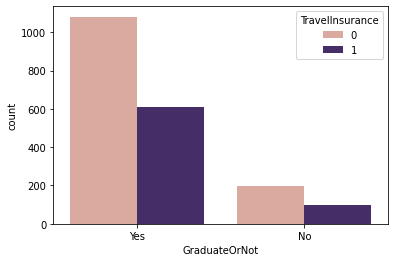

In [ ]:
sns.countplot('GraduateOrNot',hue='TravelInsurance',data=df, palette=['#E4A497','#432371'])
plt.show()

Taking Travel Insurance or not, isn't really affected by whether the person is a Graduate or not.

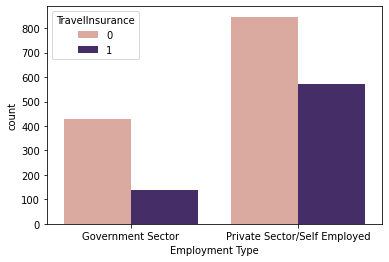

In [ ]:
sns.countplot('Employment Type',hue='TravelInsurance',data=df, palette=['#E4A497','#432371'])
plt.show()

Taking Travel Insurance or not, isn't really affected by whether the person works in Government Sector or Private Sector/Self-Employed.

In [ ]:
df['Employment Type'].replace({'Private Sector/Self Employed':1, 'Government Sector':0},inplace=True)
df['GraduateOrNot'].replace({'No':0, 'Yes':1},inplace=True)
df['FrequentFlyer'].replace({'No':0, 'Yes':1},inplace=True)
df['EverTravelledAbroad'].replace({'No':0, 'Yes':1},inplace=True)

So, dataframe is updated with changed column values.

In [ ]:
df.corr()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,-0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,-0.115134,1.000000,-0.127133,0.349157,-0.003354,-0.011553,0.143790,0.181098,0.147847
GraduateOrNot,0.027125,-0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,-0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,-0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


## Feature Engineering

In [ ]:
# Creating a numpy array of Age values 
x = df['Age'].values
# List of new categories
types = [0, 1]
# New column based on certain conditions
df['Age Category']=np.select([x<=32, x>32],types)

In [ ]:
x = df['AnnualIncome'].values
incometypes = [0, 1]
df['AnnualCategory']=np.select([x<=1300000, x>1300000],incometypes)

New columns of Income and Age are created based on their initial influence on Travel Insurance.

In [ ]:
df_final = df.drop(columns=["AnnualIncome", "Age"])

No need for columns-Age, AnnualIncome anymore.

In [ ]:
df_final.head()

,Employment Type,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age Category,AnnualCategory
0,0,1,6,1,0,0,0,0,0
1,1,1,7,0,0,0,0,0,0
2,1,1,4,1,0,0,1,1,0
3,1,1,3,1,0,0,0,0,0
4,1,1,8,1,1,0,0,0,0


In [ ]:
df_final.corr()

,Employment Type,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age Category,AnnualCategory
Employment Type,1.000000,-0.127133,-0.003354,-0.011553,0.143790,0.181098,0.147847,0.002542,0.237198
GraduateOrNot,-0.127133,1.000000,0.021201,0.018811,-0.028120,0.062683,0.018934,0.014521,0.025348
FamilyMembers,-0.003354,0.021201,1.000000,0.028209,-0.023775,-0.020755,0.079909,0.009633,-0.031856
ChronicDiseases,-0.011553,0.018811,0.028209,1.000000,-0.043720,0.021238,0.018190,0.014025,0.000135
FrequentFlyer,0.143790,-0.028120,-0.023775,-0.043720,1.000000,0.277334,0.232103,0.036319,0.411703
EverTravelledAbroad,0.181098,0.062683,-0.020755,0.021238,0.277334,1.000000,0.433183,0.058102,0.754176
TravelInsurance,0.147847,0.018934,0.079909,0.018190,0.232103,0.433183,1.000000,0.171576,0.533486
Age Category,0.002542,0.014521,0.009633,0.014025,0.036319,0.058102,0.171576,1.000000,0.014728
AnnualCategory,0.237198,0.025348,-0.031856,0.000135,0.411703,0.754176,0.533486,0.014728,1.000000


Deleting the columns(Age, AnnualIncome) after dividing the values based on whether they influence Travel Insurance or not, the Correlation values between Travel Insurance and the divided or new categorical columns has increased.

## Data Preprocessing and Model Selection

In [ ]:
x=df_final.drop(columns=["TravelInsurance"])

In [ ]:
y=df_final[['TravelInsurance']]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35)

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_test.head()

,TravelInsurance
983,1
357,0
1324,1
1060,0
372,0


In [ ]:
y_pred[0:5]

array([0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
print('LR model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('LR model F1 score: {0:0.4f}'. format(f1_score(y_test, y_pred)))
print('LR model precision score: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('LR model recall score: {0:0.4f}'. format(recall_score(y_test, y_pred)))

LR model accuracy score: 0.8032
LR model F1 score: 0.6566
LR model precision score: 0.9161
LR model recall score: 0.5117


In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[428  12]
 [125 131]]


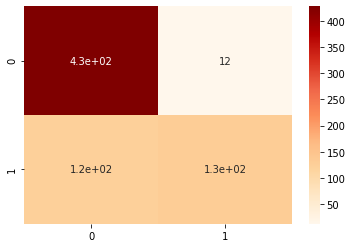

In [ ]:
sns.heatmap(cf_matrix, annot=True, cmap='OrRd')

**0.77** is the accuracy according to Logistic Regression Model.

In [ ]:
x=df_final.drop(columns=["TravelInsurance"])

In [ ]:
y=df_final[['TravelInsurance']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [ ]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier()
xgbmodel.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
y_pred = xgbmodel.predict(x_test)

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('XGBoost model F1 score: {0:0.4f}'. format(f1_score(y_test, y_pred)))
print('XGBoost model precision score: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('XGBoost model recall score: {0:0.4f}'. format(recall_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8376
XGBoost model F1 score: 0.7224
XGBoost model precision score: 0.9018
XGBoost model recall score: 0.6025


In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[436  16]
 [ 97 147]]


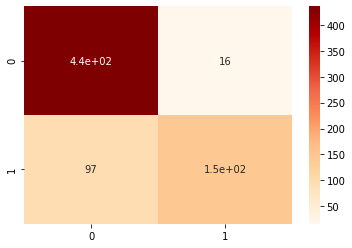

In [ ]:
sns.heatmap(cf_matrix, annot=True, cmap='OrRd')

So, comparing the two models, **XGBoost Model** gives a better accuracy of **0.88**.

### *BY- SHRUTI BANSAL* 
#### Connect with me on-
### [Github](https://github.com/shruti3000)       [LinkedIn](https://www.linkedin.com/in/shruti-b-6743361bb)